## Exploratory Data Analysis (EDA) 

In [2]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd
import missingno as msno

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

## Business Dataset

In [2]:
import json
import csv

# Specify the path to the JSON file
json_file = 'yelp_academic_dataset_business.json'

# Specify the path to the CSV file
csv_file = 'business.csv'

# Read JSON data from file and convert each JSON object to a dictionary
data = []
with open(json_file, 'r') as file:
    for line in file:
        data.append(json.loads(line))

# Write JSON data to CSV
with open(csv_file, 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=data[0].keys())
    writer.writeheader()
    writer.writerows(data)

print("CSV file has been created successfully!")

CSV file has been created successfully!


In [3]:
business = pd.read_csv('business.csv')

In [4]:
business.head(1)

business_id                      name                 address  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ  1616 Chapala St, Ste 2   

            city state postal_code   latitude   longitude  stars  \
0  Santa Barbara    CA       93101  34.426679 -119.711197    5.0   

   review_count  is_open                     attributes  \
0             7        0  {'ByAppointmentOnly': 'True'}   

                                          categories hours  
0  Doctors, Traditional Chinese Medicine, Naturop...   NaN

In [5]:
business.shape

(150346, 14)

In [6]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       145219 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150273 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [7]:
business.describe()

latitude      longitude          stars   review_count  \
count  150346.000000  150346.000000  150346.000000  150346.000000   
mean       36.671150     -89.357339       3.596724      44.866561   
std         5.872759      14.918502       0.974421     121.120136   
min        27.555127    -120.095137       1.000000       5.000000   
25%        32.187293     -90.357810       3.000000       8.000000   
50%        38.777413     -86.121179       3.500000      15.000000   
75%        39.954036     -75.421542       4.500000      37.000000   
max        53.679197     -73.200457       5.000000    7568.000000   

            is_open  
count  150346.00000  
mean        0.79615  
std         0.40286  
min         0.00000  
25%         1.00000  
50%         1.00000  
75%         1.00000  
max         1.00000

In [8]:
business.business_id.unique()

array(['Pns2l4eNsfO8kk83dixA6A', 'mpf3x-BjTdTEA3yCZrAYPw',
       'tUFrWirKiKi_TAnsVWINQQ', ..., '_QAMST-NrQobXduilWEqSw',
       'mtGm22y5c2UHNXDFAjaPNw', 'jV_XOycEzSlTx-65W906pg'], dtype=object)

In [9]:
business.business_id.value_counts()

business_id
Pns2l4eNsfO8kk83dixA6A    1
twx6DPOgaD9CN8wlt4Jcbg    1
ogyKKg_D4ioc6Ech_pKqfw    1
9D0aKRGsutg8S0ClIanmrA    1
_XV_ug_IUiJrGfMiJUqz-Q    1
                         ..
WVYcB73fVpBMznlhhqjL4w    1
f9C3eDtfbQrFklCCLDFuaQ    1
WTkDTPmeR_LZn56-xDinZw    1
1uAgni70WHOW2CVOfRMurw    1
jV_XOycEzSlTx-65W906pg    1
Name: count, Length: 150346, dtype: int64

In [10]:
business.nunique()

business_id     150346
name            114117
address         122843
city              1416
state               27
postal_code       3361
latitude        135593
longitude       131918
stars                9
review_count      1158
is_open              2
attributes       87661
categories       83160
hours            49822
dtype: int64

In [11]:
business.isnull().sum()

business_id         0
name                0
address          5127
city                0
state               0
postal_code        73
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [12]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [13]:
business['categories'].value_counts()

categories
Beauty & Spas, Nail Salons                                                                                       1012
Restaurants, Pizza                                                                                                935
Nail Salons, Beauty & Spas                                                                                        934
Pizza, Restaurants                                                                                                823
Restaurants, Mexican                                                                                              728
                                                                                                                 ... 
Dermatologists, Health & Medical, Cosmetic Surgeons, Doctors, Acne Treatment, Skin Care, Beauty & Spas              1
Home Services, Home & Garden, Nurseries & Gardening, Hardware Stores, Shopping, Building Supplies, Appliances       1
Food Trucks, Smokehouse, Restaurants, Food, B

In [14]:
business['city'].value_counts()

city
Philadelphia      14569
Tucson             9250
Tampa              9050
Indianapolis       7540
Nashville          6971
                  ...  
Gentilly              1
pennsauken            1
Hamiltion             1
Newtown square        1
Apollo beach          1
Name: count, Length: 1416, dtype: int64

In [15]:
business['is_open'].value_counts()

is_open
1    119698
0     30648
Name: count, dtype: int64

In [16]:
business['review_count'].value_counts()

review_count
5       14921
6       11673
7        9594
8        8040
9        6875
        ...  
2417        1
1001        1
2473        1
1583        1
754         1
Name: count, Length: 1158, dtype: int64

In [17]:
business['stars'].value_counts()

stars
4.0    31125
4.5    27181
3.5    26519
3.0    18453
5.0    16307
2.5    14316
2.0     9527
1.5     4932
1.0     1986
Name: count, dtype: int64

In [18]:
business['state'].value_counts()

state
PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64

<Axes: >

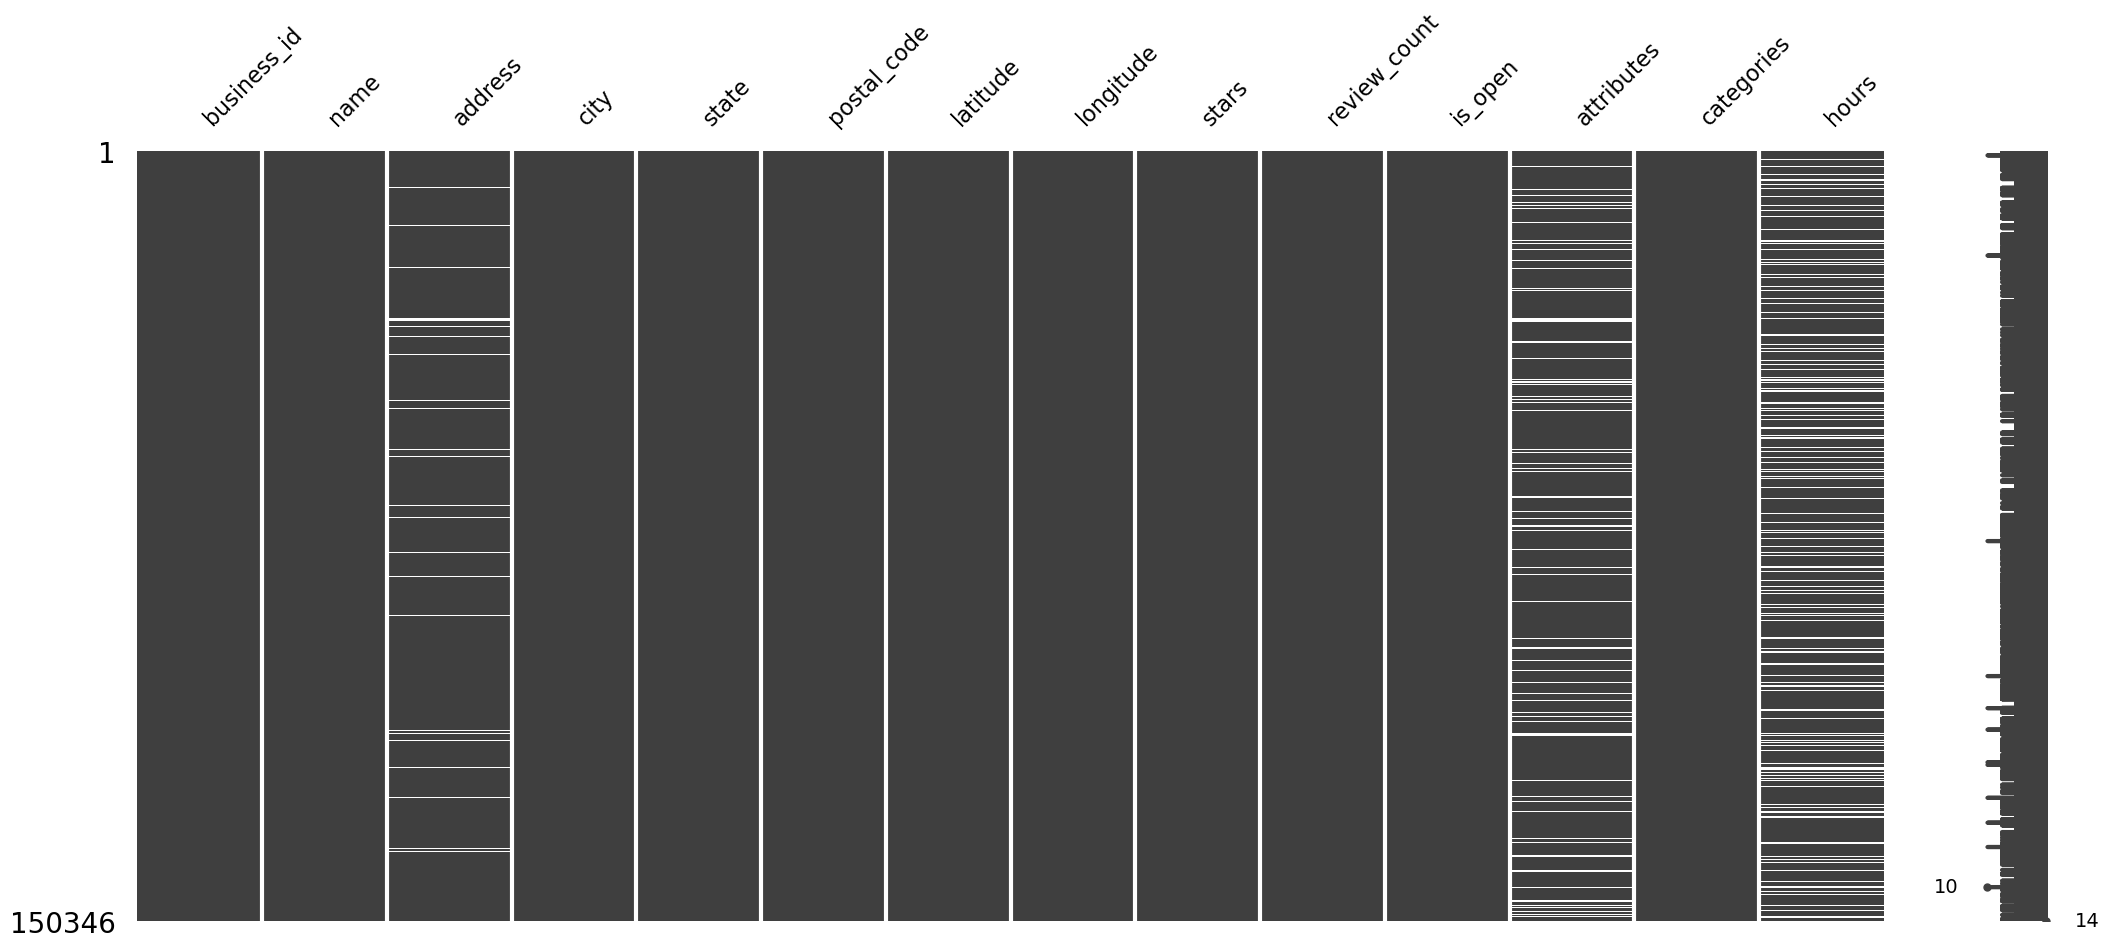

In [19]:
#matrix map of missing values
msno.matrix(business)

## Reviews Dataset

In [6]:
# Specify the path to the JSON file
json_file = 'yelp_academic_dataset_review.json'

# Specify the path to the CSV file
csv_file = 'review.csv'

# Read JSON data from file and convert each JSON object to a dictionary
data = []
with open(json_file, 'r') as file:
    for line in file:
        data.append(json.loads(line))

# Write JSON data to CSV
with open(csv_file, 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=data[0].keys())
    writer.writeheader()
    writer.writerows(data)

print("CSV file has been created successfully!")

CSV file has been created successfully!


In [20]:
review = pd.read_csv('review.csv')

In [21]:
review.head(1)

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   

   stars  useful  funny  cool  \
0    3.0       0      0     0   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11

In [22]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [23]:
review.describe()

stars        useful         funny          cool
count  6.990280e+06  6.990280e+06  6.990280e+06  6.990280e+06
mean   3.748584e+00  1.184609e+00  3.265596e-01  4.986175e-01
std    1.478705e+00  3.253767e+00  1.688729e+00  2.172460e+00
min    1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00
25%    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    4.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    5.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
max    5.000000e+00  1.182000e+03  7.920000e+02  4.040000e+02

In [24]:
review.shape

(6990280, 9)

In [25]:
review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [31]:
review.nunique()

review_id      6990280
user_id        1987929
business_id     150346
stars                5
useful             259
funny              201
cool               210
text           6974127
date           6885665
dtype: int64

In [26]:
review['stars'].value_counts()

stars
5.0    3231627
4.0    1452918
1.0    1069561
3.0     691934
2.0     544240
Name: count, dtype: int64

In [27]:
review['cool'].value_counts()

cool
0      5377964
1      1016736
2       296999
3       114763
4        56609
        ...   
133          1
205          1
306          1
370          1
304          1
Name: count, Length: 210, dtype: int64

## Missing values

Business Dataset

In [28]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', business.isnull().values.sum())
print('Percent of missing values per feature: ') 
business.isnull().sum() * 100 / len(business)

Number of missing values:  42270
Percent of missing values per feature: 


business_id      0.000000
name             0.000000
address          3.410134
city             0.000000
state            0.000000
postal_code      0.048555
latitude         0.000000
longitude        0.000000
stars            0.000000
review_count     0.000000
is_open          0.000000
attributes       9.141580
categories       0.068509
hours           15.446370
dtype: float64

review Dataset

In [29]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', review.isnull().values.sum())
print('Percent of missing values per feature: ') 
review.isnull().sum() * 100 / len(review)

Number of missing values:  0
Percent of missing values per feature: 


review_id      0.0
user_id        0.0
business_id    0.0
stars          0.0
useful         0.0
funny          0.0
cool           0.0
text           0.0
date           0.0
dtype: float64

## Checking duplicates

There were no duplicate rows detected in the dataset

In [30]:
#checking for duplicate rows
len(business) - len(business.drop_duplicates())

0

In [35]:
#checking for duplicate rows
len(review) - len(review.drop_duplicates())

0

## Visualizing features from dataset

## 1. Over time, how frequently are businesses reviewed?

In [31]:
#checking the range of dates
print('Least recent date: ', review['date'].min())
print('Recent date: ', review['date'].max())

Least recent date:  2005-02-16 03:23:22
Recent date:  2022-01-19 19:48:45


In [32]:
review["date"] = review["date"].str.split(" ").str[0]

# Convert the date column to datetime
review["date"] = pd.to_datetime(review["date"], format='%Y-%m-%d')

# Create a new column containing the year of review
review['year'] = review.date.dt.year

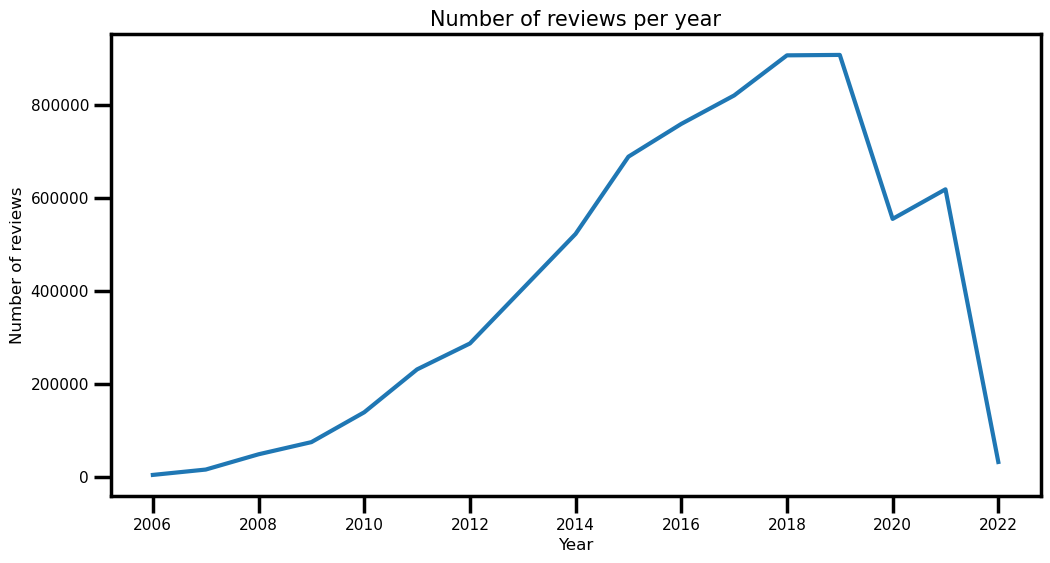

In [33]:
#number of reviews per year not including 2005 and 2013
reviews_per_year = review.groupby(['year']).size().reset_index(name='occurence').drop([0,8])

plt.figure(figsize=(12,6))
sns.lineplot(data = reviews_per_year, x = 'year', y = 'occurence')
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of reviews per year', fontsize=15)
plt.show();

## 2. Number of values per star rating

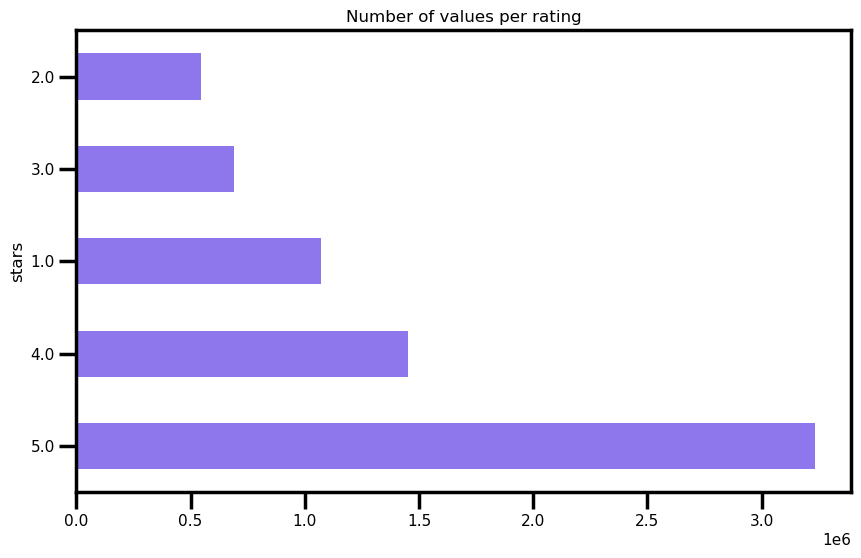

In [34]:
review['stars'].value_counts().plot.barh(color = '#8e77ec', figsize = (10,6), title = 'Number of values per rating');

## 3. Counting reviews

In [35]:
print('Total number of reviews: ', len(review))
print('Positive reviews: ', len(review[review['stars'] >= 4]))
print('Neutral reviews: ', len(review[review['stars'] == 3]))
print('Negative reviews: ', len(review[review['stars'] <= 2]))
print('Useful reviews: ', len(review[review['useful'] > 0]))
print('Cool reviews: ', len(review[review['cool'] > 0]))
print('Funny reviews: ', len(review[review['funny'] > 0]))

Total number of reviews:  6990280
Positive reviews:  4684545
Neutral reviews:  691934
Negative reviews:  1613801
Useful reviews:  3149784
Cool reviews:  1612315
Funny reviews:  1096161


## 4. Common Words used in review 'text'

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gauravsharma/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


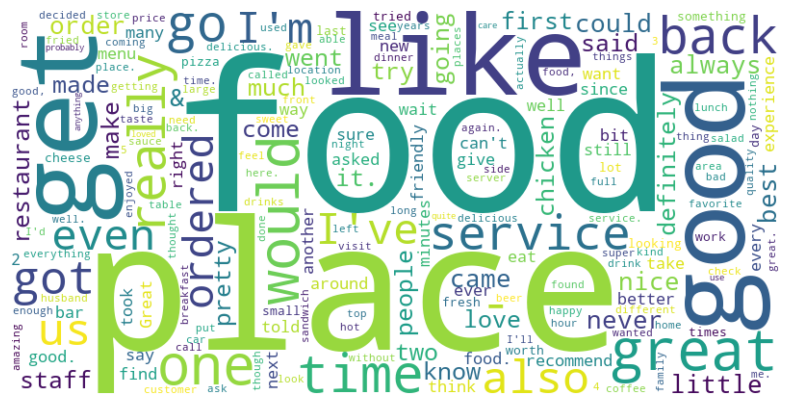

In [37]:
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download the stopwords list from NLTK
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Initialize an empty Counter to store word frequencies
word_counts = Counter()

# Iterate over each text entry in the 'text' column
for text_entry in review['text']:
    # Tokenize the text entry (split into words)
    words = text_entry.split()
    
    # Remove stopwords from the list of words
    words = [word for word in words if word.lower() not in stop_words]
    
    # Update the word counts for this text entry
    word_counts.update(words)

# Generate word cloud from the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 5. Which company categories are receiving the best reviews?

In [51]:
#creating a new dataframe that contains top 30 rated business sorted by the number of positive reviews
good_business = business[(business['stars'] >= 4) & (business['review_count'] > 300)]
most_rated = good_business[['name', 
                             'review_count', 
                             'stars',
                            'categories']].sort_values(by='review_count', ascending=False)[:30]

In [52]:
#separating values in categories and saving it to a list, and removing leading and trailing white space
cat_most_rated_list = most_rated.categories.str.split(',').sum()
cat_most_rated_list = [x.strip() for x in cat_top_rated_list]

#converting given values to a dictionary
cat_most_rated_dict = {}
for c in range(len(cat_most_rated_list)):
    cat_most_rated_dict[cat_most_rated_list[c]] = cat_most_rated_list.count(cat_most_rated_list[c])

#converting the given dictionary to a DataFrame with categories of top reviewed businesses
cat_most_rated = pd.DataFrame.from_dict(data = cat_most_rated_dict,orient="index")
cat_most_rated.reset_index(inplace = True)
cat_most_rated.columns = ['category', 'occurance']

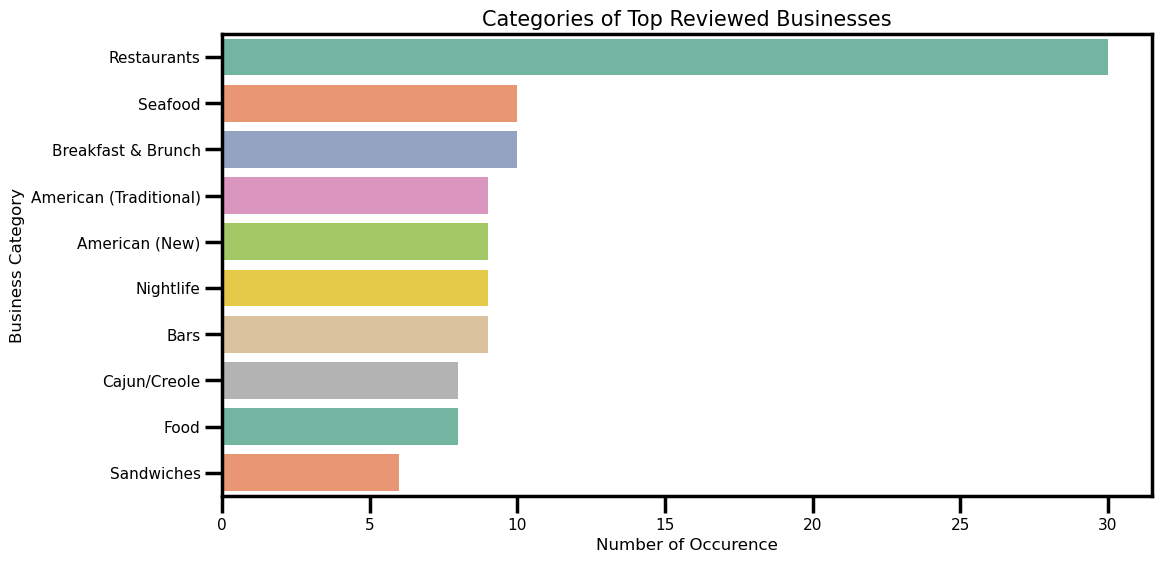

In [53]:
#visualizing the share of each category present in the top 30 reviewed businesses
size = cat_most_rated.nlargest(10,'occurance')['occurance']
label = cat_most_rated.nlargest(10,'occurance')['category']

plt.figure(figsize=(12,6))
sns.barplot(data = cat_top_rated, x = size, y = label, palette = 'Set2')
plt.ylabel('Business Category', fontsize=12)
plt.xlabel('Number of Occurence', fontsize=12)
plt.title('Categories of Top Reviewed Businesses', fontsize=15)
plt.show();

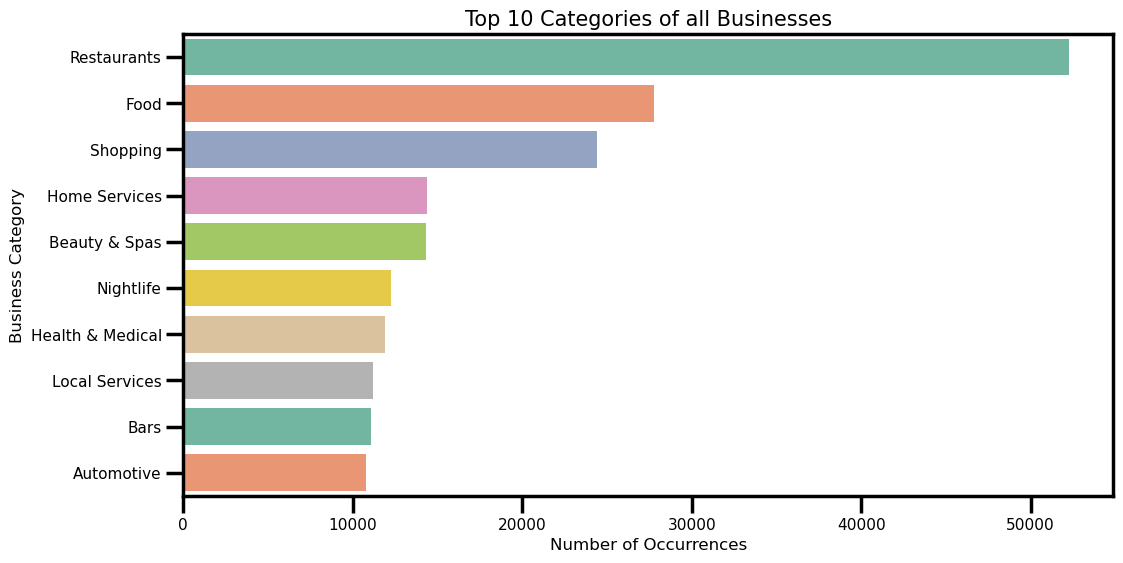

In [54]:
# Drop rows with NaN values in the 'categories' column
business = business.dropna(subset=['categories'])

# Separate values in categories and save them to a list, and remove leading and trailing white spaces
business_list_all = business.categories.str.split(',')

# Flatten the list of lists and remove leading and trailing white space
business_list_all = [item.strip() for sublist in business_list_all.dropna() for item in sublist]

# Count occurrences of each category
business_all_counts = pd.Series(business_list_all).value_counts()

# Visualize the top 10 categories
plt.figure(figsize=(12, 6))
sns.barplot(x=cat_all_counts.head(10).values, y=business_all_counts.head(10).index, palette = 'Set2')
plt.ylabel('Business Category', fontsize=12)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.title('Top 10 Categories of all Businesses', fontsize=15)
plt.show()

## 6. State and city with most Reviews

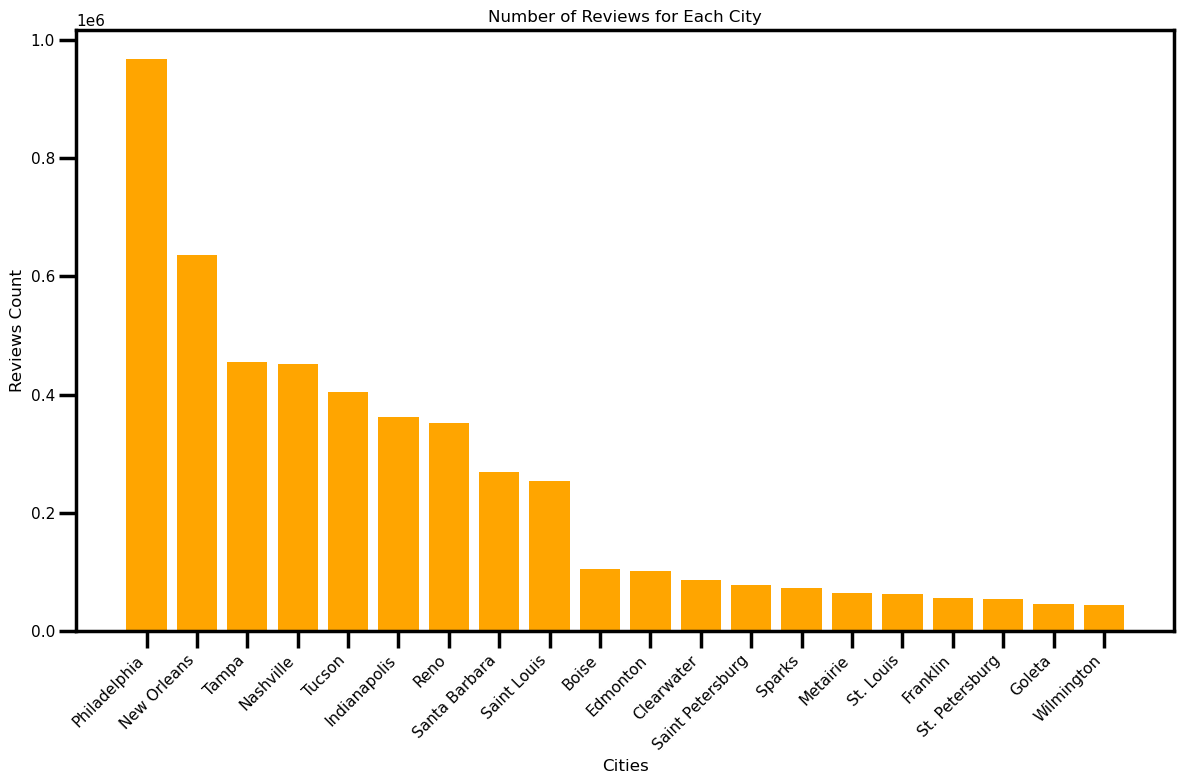

In [56]:
# Join business data and reviews
joined_df = pd.merge(business, review, on='business_id', how='inner')

# Group by city and count the number of reviews in each city
city_review_counts = joined_df.groupby("city").size().reset_index(name='count')

# Sort by count in descending order
city_review_counts = city_review_counts.sort_values(by='count', ascending=False)

# Limiting to top 20 cities
top_20_cities_review_count = city_review_counts.head(20)

# Visualization for the review count for top 20 cities
plt.figure(figsize=(12, 8))
plt.bar(top_20_cities_review_count['city'], top_20_cities_review_count['count'], color='orange')
plt.xlabel('Cities')
plt.ylabel('Reviews Count')
plt.title('Number of Reviews for Each City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

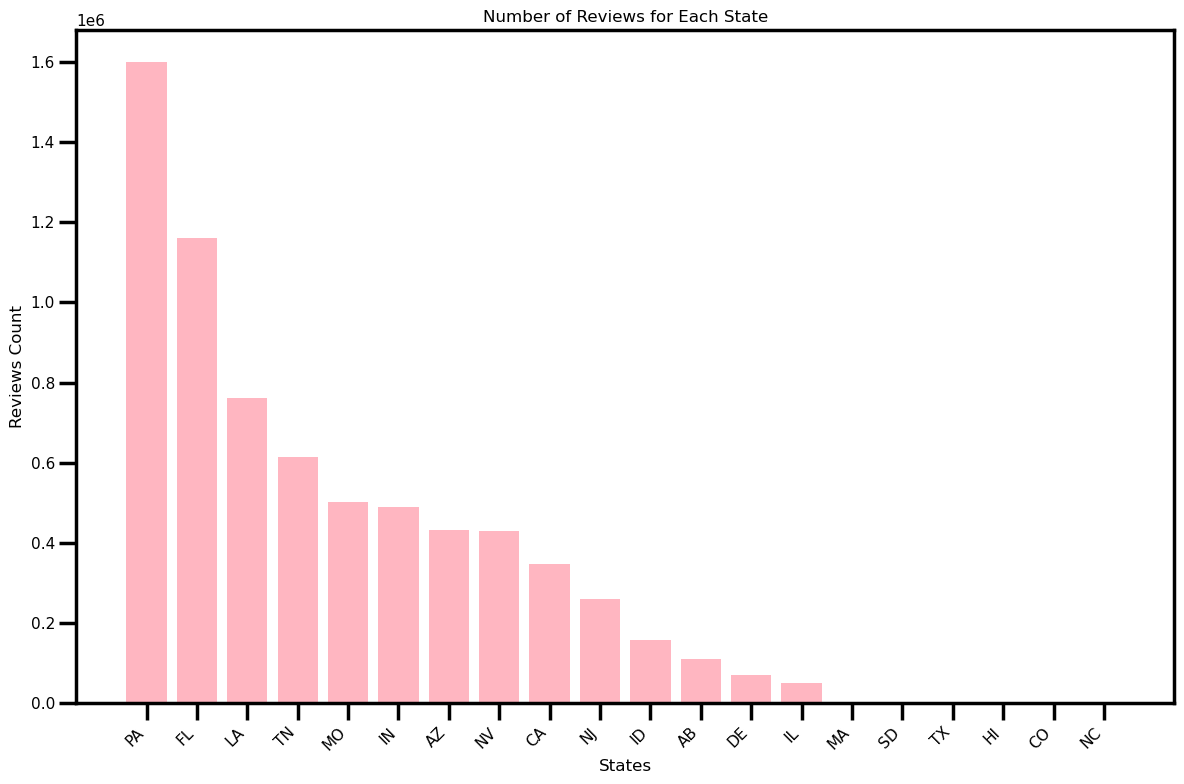

In [57]:
state_review_counts = joined_df.groupby("state").size().reset_index(name='count')

# Sort by count in descending order
state_review_counts = state_review_counts.sort_values(by='count', ascending=False)

# Limiting to top 20 states
top_20_states_review_count = state_review_counts.head(20)

# Visualization for the review count for top 20 states
plt.figure(figsize=(12, 8))
plt.bar(top_20_states_review_count['state'], top_20_states_review_count['count'], color='lightpink')
plt.xlabel('States')
plt.ylabel('Reviews Count')
plt.title('Number of Reviews for Each State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 7. Visualizing Top 10 Businesses with most reviews

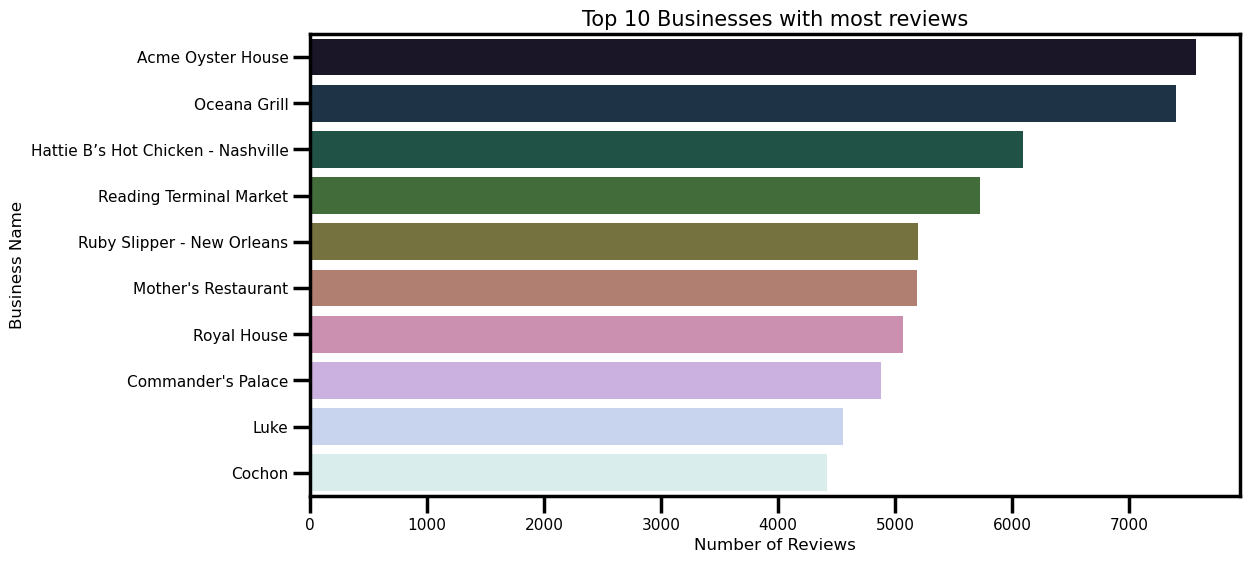

In [61]:
#visualizing top 10 businesses with most rewiews
most_reviewed = business[['name', 
                        'review_count']].reset_index().sort_values(by='review_count', 
                                                                            ascending=False)[:10]

plt.figure(figsize=(12,6))
sns.barplot(data = most_reviewed, x = 'review_count', y = 'name', palette = 'cubehelix')
plt.ylabel('Business Name', fontsize=12)
plt.xlabel('Number of Reviews', fontsize=12)
plt.title('Top 10 Businesses with most reviews', fontsize=15)
plt.show();

## 8. Market Share of Top 10 Cities with the Most Restaurants and Food businesses

In [65]:
# Split categories string into an array
business['categories_array'] = business['categories'].str.split(', ')

# DataFrames for restaurants and food businesses
restaurants_df = business[business['categories_array'].apply(lambda x: 'Restaurants' in x)]
food_businesses_df = business[business['categories_array'].apply(lambda x: 'Food' in x)]

In [66]:
# Restaurants by city
top_cities_restaurant_business = restaurants_df['city'].value_counts().head(10)

# Food businesses by city
top_cities_food_business = food_businesses_df['city'].value_counts().head(10)

In [67]:
print("Top 10 cities with the most restaurants:")
print(top_cities_restaurant_business)

print("\nTop 10 cities with the most food businesses:")
print(top_cities_food_business)

Top 10 cities with the most restaurants:
city
Philadelphia    5852
Tampa           2960
Indianapolis    2862
Nashville       2502
Tucson          2466
New Orleans     2259
Edmonton        2166
Saint Louis     1790
Reno            1286
Boise            847
Name: count, dtype: int64

Top 10 cities with the most food businesses:
city
Philadelphia     3105
Tampa            1720
Tucson           1411
Indianapolis     1372
Nashville        1314
New Orleans      1264
Edmonton         1085
Reno              855
Saint Louis       751
Santa Barbara     571
Name: count, dtype: int64


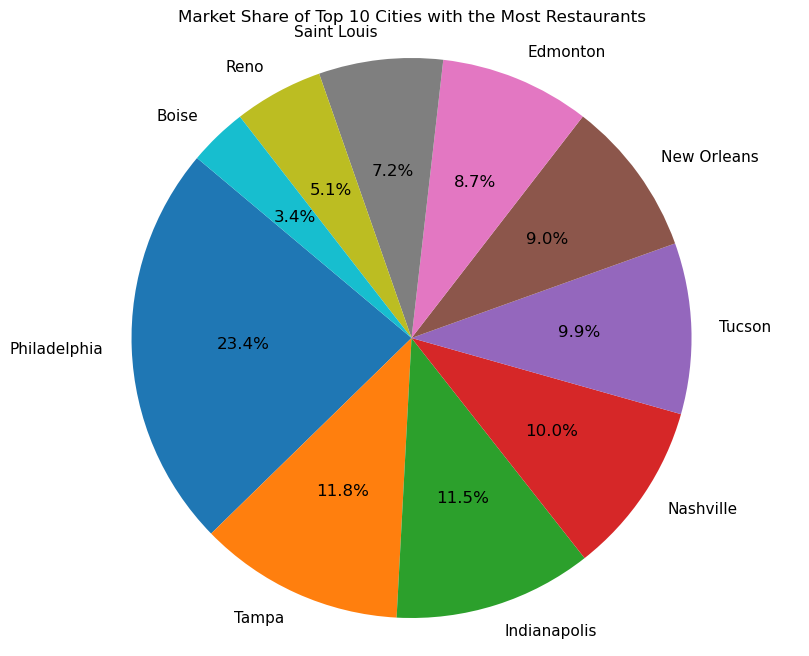

In [74]:
# Data for visualization
city_counts = top_cities_restaurant_business

# Visualization for top 10 cities with the most restaurants
plt.figure(figsize=(10, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Top 10 Cities with the Most Restaurants')
plt.axis('equal')  # Ensure pie is drawn as a circle.
plt.show()

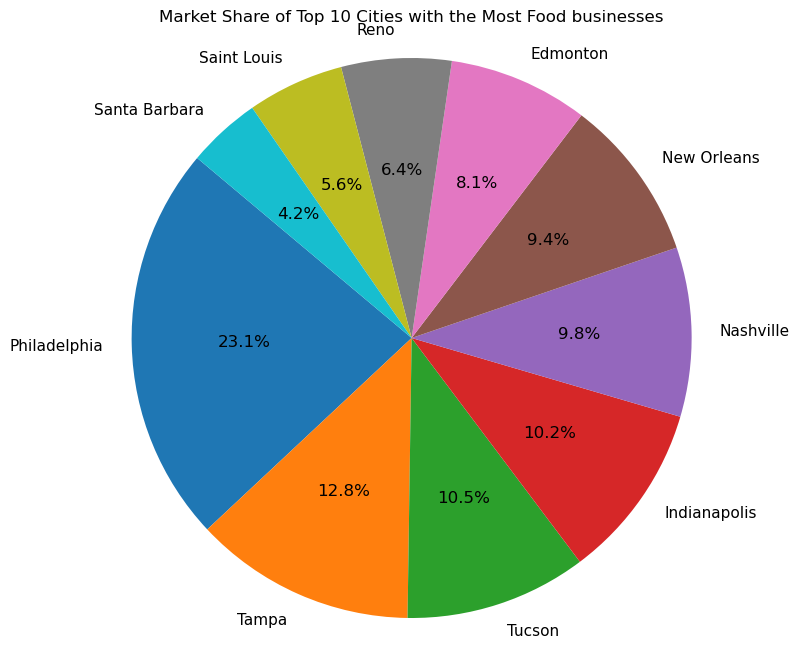

In [76]:
# Data for visualization
city_counts = top_cities_food_business

# Visualization for top 10 cities with the most restaurants
plt.figure(figsize=(10, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Top 10 Cities with the Most Food businesses')
plt.axis('equal')  # Ensure pie is drawn as a circle.
plt.show()